In [6]:
import os, geopandas as gpd

In [8]:
countries=gpd.read_file(os.path.join("data","World_Countries","World_Countries.shp"))

In [11]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [12]:
# dimensions
countries.shape

(252, 2)

In [13]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [14]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [15]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [16]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<AxesSubplot:>

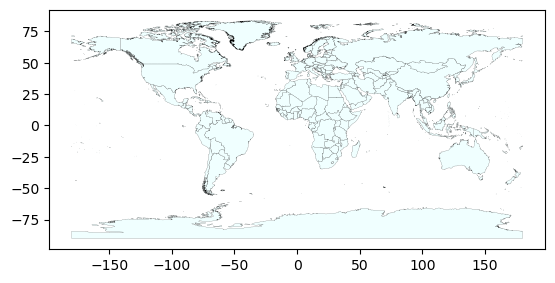

In [19]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [23]:
cities=gpd.read_file(os.path.join("data","World_Cities","World_Cities.shp"))

<AxesSubplot:>

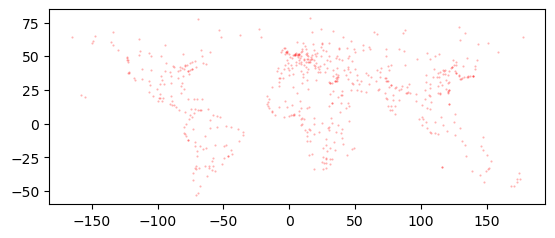

In [24]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

In [26]:
countries.crs==cities.crs==cities.crs

True

<AxesSubplot:>

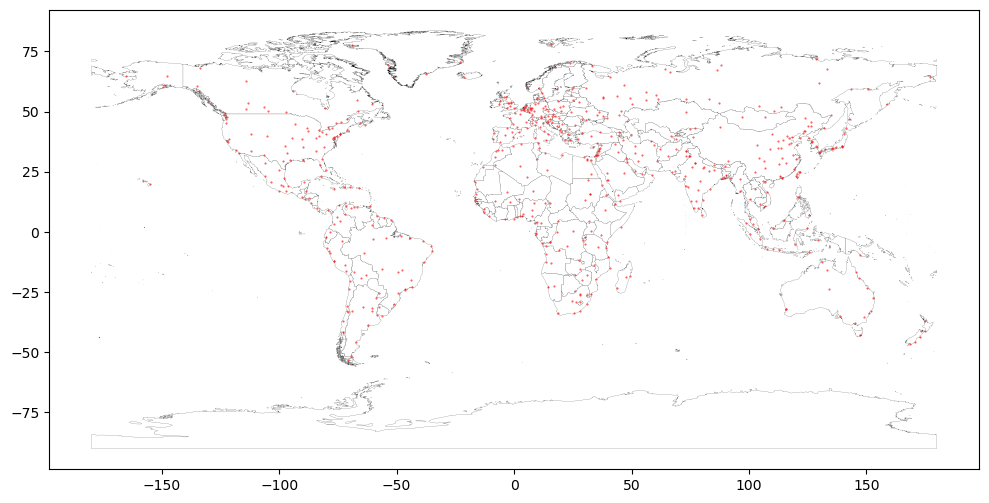

In [28]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [30]:
countries.to_file(os.path.join("data","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
cities.to_file(os.path.join("data","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

In [32]:
#Subsetting

In [33]:
argentina=countries[countries.COUNTRY=='argentina']

In [34]:
citiesargentina_clipped = gpd.clip(gdf=cities,
                          mask=argentina)

In [35]:
base = argentina.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesargentina_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)



C:\Users\Bruno Otiniano\anaconda3\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

ValueError: cannot convert float NaN to integer

<Figure size 500x500 with 1 Axes>